# Plot the Triggering Threshold $\theta$ Selection

The following code generates Figure 15

Please run other notebooks first to generate necessary data used in this notebook

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/trigger'

/home/yiqinzhao/Projects/prometheus


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [4]:
df_trigger = pd.read_csv(f'{WORKING_DIR}/results/trigger_values.csv')
df_res = pd.DataFrame(columns=['dataset', 'theta', 'metric', 'method', 'accuracy'])

<AxesSubplot:>

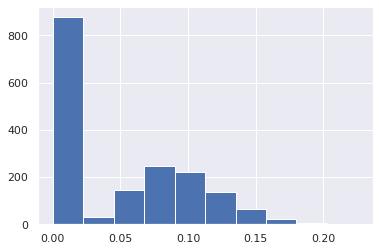

In [36]:
df_trigger[df_trigger['trigger_method'] == 'image']['value'].hist()

In [5]:
for m in range(3):
    metric_name = ['shc_mse', 'psnr', 'ssim'][m]
    
    for i in tqdm(range(25)):
        l = i + 1
        r = 100 - l
        
        df_data = pd.read_csv(f'{WORKING_DIR}/dataset/{metric_name}_{l}_{r}.csv')
        idx = df_data['idx']
        df_len = len(idx)
        
        for t in range(5, 121):
            theta = t / 100 # [0, 1], step 0.01
            
            t = lambda x: df_trigger[df_trigger['trigger_method'] == x].iloc[idx]['value'].values
            

            t_image_acc = ((t('image') >= theta) == df_data['decision']).sum() / df_len
            t_xihe_1_acc = ((t('xihe_1') >= theta) == df_data['decision']).sum() / df_len
            t_xihe_4_acc = ((t('xihe_4') >= theta) == df_data['decision']).sum() / df_len
            t_xihe_9_acc = ((t('xihe_9') >= theta) == df_data['decision']).sum() / df_len
            t_xihe_16_acc = ((t('xihe_16') >= theta) == df_data['decision']).sum() / df_len
            

            df_res.loc[len(df_res)] = [i, theta, metric_name, 'image', t_image_acc]
            df_res.loc[len(df_res)] = [i, theta, metric_name, 'xihe_1', t_xihe_1_acc]
            df_res.loc[len(df_res)] = [i, theta, metric_name, 'xihe_4', t_xihe_4_acc]
            df_res.loc[len(df_res)] = [i, theta, metric_name, 'xihe_9', t_xihe_9_acc]
            df_res.loc[len(df_res)] = [i, theta, metric_name, 'xihe_16', t_xihe_16_acc]

100%|██████████| 25/25 [04:48<00:00, 11.54s/it]


In [6]:
df_res.to_csv(f'{WORKING_DIR}/results/triggering.csv')

In [6]:
df_res = pd.read_csv(f'{WORKING_DIR}/results/triggering.csv')

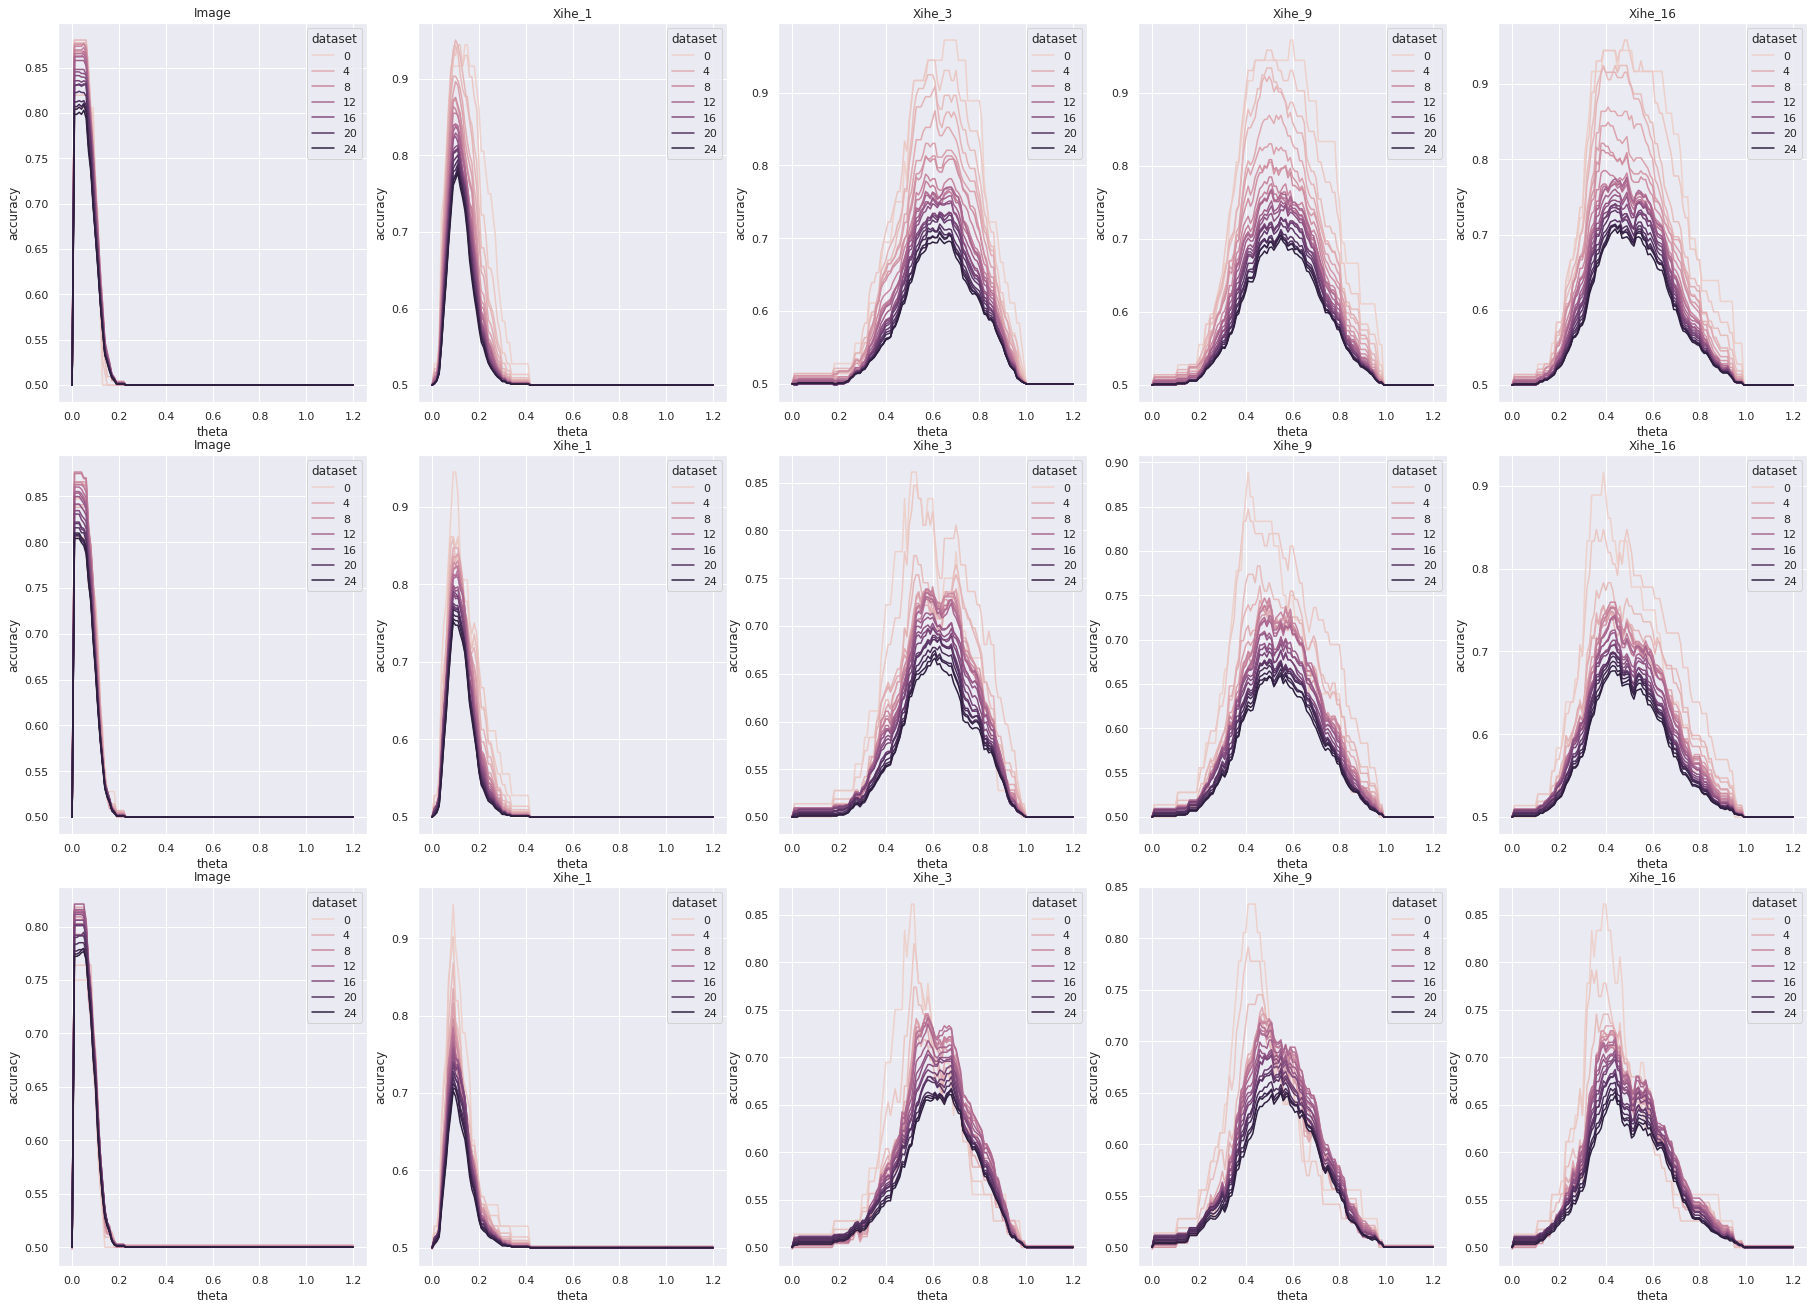

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25,18))

r = 0
axes[r, 0].set_title('Image')
axes[r, 1].set_title('Xihe_1')
axes[r, 2].set_title('Xihe_3')
axes[r, 3].set_title('Xihe_9')
axes[r, 4].set_title('Xihe_16')

df_vis = df_res[df_res['metric'] == 'shc_mse']

sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'image'], ax=axes[r, 0])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_1'], ax=axes[r, 1])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_4'], ax=axes[r, 2])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_9'], ax=axes[r, 3])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_16'], ax=axes[r, 4])


r = 1
axes[r, 0].set_title('Image')
axes[r, 1].set_title('Xihe_1')
axes[r, 2].set_title('Xihe_3')
axes[r, 3].set_title('Xihe_9')
axes[r, 4].set_title('Xihe_16')

df_vis = df_res[df_res['metric'] == 'psnr']

sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'image'], ax=axes[r, 0])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_1'], ax=axes[r, 1])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_4'], ax=axes[r, 2])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_9'], ax=axes[r, 3])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_16'], ax=axes[r, 4])


r = 2
axes[r, 0].set_title('Image')
axes[r, 1].set_title('Xihe_1')
axes[r, 2].set_title('Xihe_3')
axes[r, 3].set_title('Xihe_9')
axes[r, 4].set_title('Xihe_16')

df_vis = df_res[df_res['metric'] == 'ssim']

sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'image'], ax=axes[r, 0])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_1'], ax=axes[r, 1])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_4'], ax=axes[r, 2])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_9'], ax=axes[r, 3])
sns.lineplot(x='theta', y='accuracy', hue='dataset', data=df_vis[df_vis['method'] == 'xihe_16'], ax=axes[r, 4])

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/tirgger_accuracy.pdf')  

In [8]:
df_res['epsilon'] = (df_res['dataset'] + 1) / 100

<ipython-input-9-548dddd4e116>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
<ipython-input-9-548dddd4e116>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)


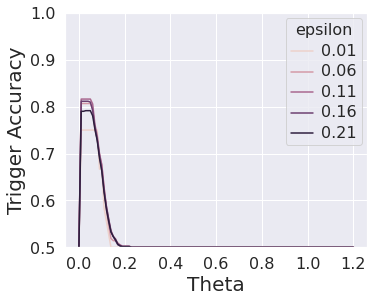

In [9]:
plt.figure(figsize=(5, 4))

df_vis = df_res[df_res['dataset'] % 5 == 0]
df_vis = df_vis[df_vis['metric'] == 'ssim']

ax = sns.lineplot(x='theta', y='accuracy', hue='epsilon', data=df_vis[df_vis['method'] == 'image'])

ax.set_ylim(0.5, 1)

ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Trigger Accuracy', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/trigger_image.pdf')  

<ipython-input-10-c6b25f9969e3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
<ipython-input-10-c6b25f9969e3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)


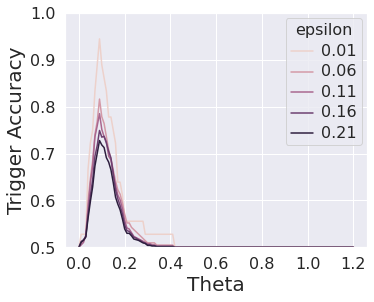

In [10]:
plt.figure(figsize=(5, 4))

df_vis = df_res[df_res['dataset'] % 5 == 0]
df_vis = df_vis[df_vis['metric'] == 'ssim']

ax = sns.lineplot(x='theta', y='accuracy', hue='epsilon', data=df_vis[df_vis['method'] == 'xihe_1'])

ax.set_ylim(0.5, 1)

ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Trigger Accuracy', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/trigger_xihe_1.pdf')  

<ipython-input-11-7d7acdf3c121>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
<ipython-input-11-7d7acdf3c121>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)


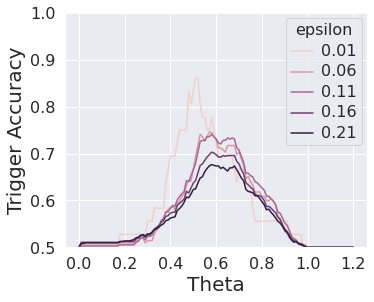

In [11]:
plt.figure(figsize=(5, 4))

df_vis = df_res[df_res['dataset'] % 5 == 0]
df_vis = df_vis[df_vis['metric'] == 'ssim']

ax = sns.lineplot(x='theta', y='accuracy', hue='epsilon', data=df_vis[df_vis['method'] == 'xihe_4'])

ax.set_ylim(0.5, 1)

ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Trigger Accuracy', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/trigger_xihe_4.pdf')  

<ipython-input-12-1101b76ba019>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
<ipython-input-12-1101b76ba019>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)


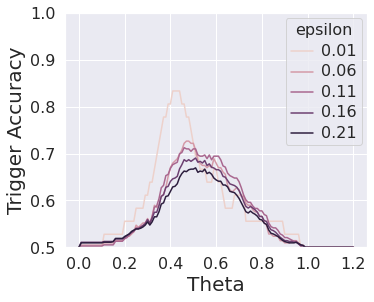

In [12]:
plt.figure(figsize=(5, 4))

df_vis = df_res[df_res['dataset'] % 5 == 0]
df_vis = df_vis[df_vis['metric'] == 'ssim']

ax = sns.lineplot(x='theta', y='accuracy', hue='epsilon', data=df_vis[df_vis['method'] == 'xihe_9'])

ax.set_ylim(0.5, 1)

ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Trigger Accuracy', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/trigger_xihe_9.pdf')  

<ipython-input-13-69013415b7b5>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
<ipython-input-13-69013415b7b5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)


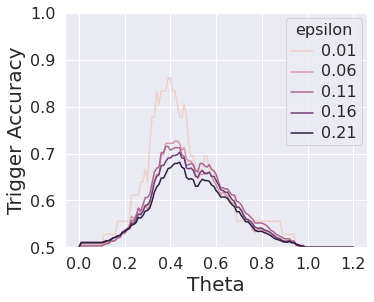

In [13]:
plt.figure(figsize=(5, 4))

df_vis = df_res[df_res['dataset'] % 5 == 0]
df_vis = df_vis[df_vis['metric'] == 'ssim']

ax = sns.lineplot(x='theta', y='accuracy', hue='epsilon', data=df_vis[df_vis['method'] == 'xihe_16'])

ax.set_ylim(0.5, 1)

ax.set_xlabel('Theta', fontsize=20)
ax.set_ylabel('Trigger Accuracy', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1), size=16)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1), size=16)
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/trigger_xihe_16.pdf')  